Libraries imported successfully!
Test signal generated:
- Duration: 2 seconds
- Signal frequency: 50 Hz
- Sampling frequency: 1000 Hz
- Signal length: 2000 samples


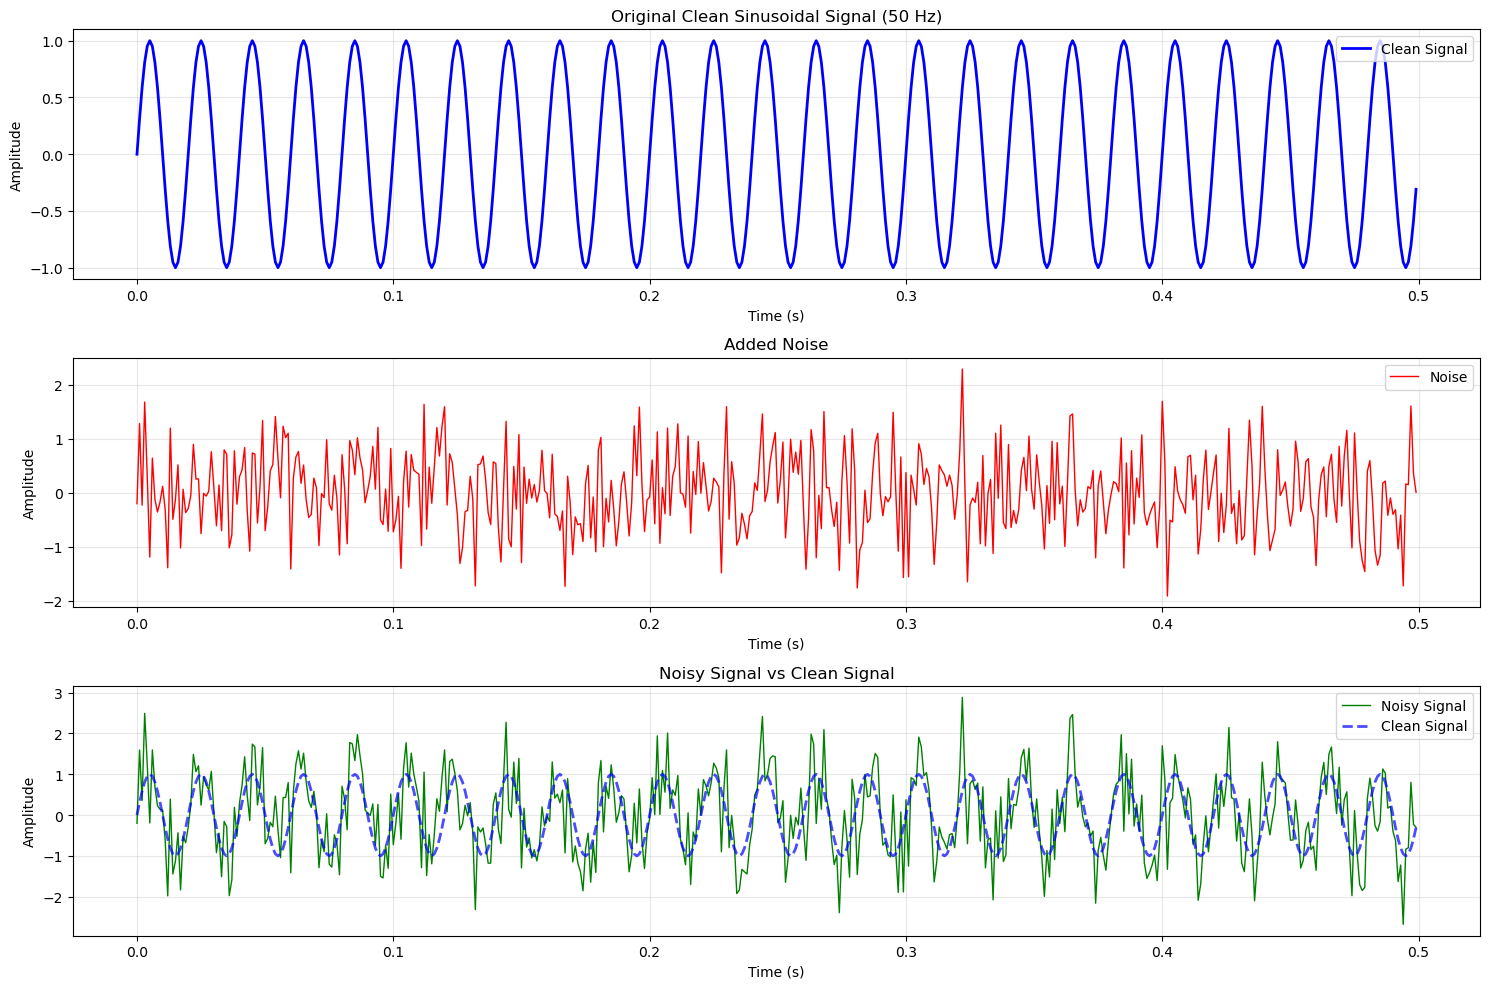

AttributeError: 'numpy.ndarray' object has no attribute 'lfilter'

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")

def generate_test_signal(duration=2, f_signal=50, noise_power=0.5, fs=1000):
    """Generate a noisy sinusoidal test signal"""
    t = np.linspace(0, duration, int(fs * duration), endpoint=False)
    
    clean_signal = np.sin(2 * np.pi * f_signal * t)
    
    noise = np.random.normal(0, np.sqrt(noise_power), len(t))
    noisy_signal = clean_signal + noise
    
    return t, clean_signal, noisy_signal, noise

t, clean_signal, noisy_signal, noise = generate_test_signal()

print(f"Test signal generated:")
print(f"- Duration: 2 seconds")
print(f"- Signal frequency: 50 Hz")
print(f"- Sampling frequency: 1000 Hz")
print(f"- Signal length: {len(t)} samples")

plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(t[:500], clean_signal[:500], 'b-', linewidth=2, label='Clean Signal')
plt.title('Original Clean Sinusoidal Signal (50 Hz)')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t[:500], noise[:500], 'r-', linewidth=1, label='Noise')
plt.title('Added Noise')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t[:500], noisy_signal[:500], 'g-', linewidth=1, label='Noisy Signal')
plt.plot(t[:500], clean_signal[:500], 'b--', linewidth=2, alpha=0.7, label='Clean Signal')
plt.title('Noisy Signal vs Clean Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid(True, alpha=0.3)
plt.legend()

plt.tight_layout()
plt.show()

def fir_filter(signal, coefficients):
    b = np.array(coefficients)
    
    filtered_signal = signal.lfilter(b, 1, signal)
    
    return filtered_signal, b

fir_coeffs = [0, 0, 1]
fir_filtered, fir_b = fir_filter(noisy_signal, fir_coeffs)



def iir_filter(signal, b_coeffs, a_coeffs):
    b = np.array(b_coeffs)
    a = np.array(a_coeffs)
    
    poles = np.roots(a)
    stable = np.all(np.abs(poles) < 1)
    
    filtered_signal = signal.lfilter(b, a, signal)
    
    return filtered_signal, b, a, stable, poles

iir_b = [1, -1.5, 0.7]
iir_a = [1, 0.5, 0.1]
iir_filtered, iir_b_used, iir_a_used, is_stable, poles = iir_filter(noisy_signal, iir_b, iir_a)



class AdaptiveLMSFilter:
    def __init__(self, filter_length, step_size):
        self.M = filter_length  
        self.mu = step_size    
        self.w = np.zeros(self.M)  
        self.x_buffer = np.zeros(self.M)  
        
    def update(self, x, d):
        self.x_buffer[1:] = self.x_buffer[:-1]
        self.x_buffer[0] = x
        
        y = np.dot(self.w, self.x_buffer)
        
        e = d - y
        
        self.w += 2 * self.mu * e * self.x_buffer
        
        return y, e
    
    def filter_signal(self, input_signal, desired_signal):
        """Filter entire signal"""
        output_signal = np.zeros(len(input_signal))
        error_signal = np.zeros(len(input_signal))
        weight_history = []
        
        for i in range(len(input_signal)):
            y, e = self.update(input_signal[i], desired_signal[i])
            output_signal[i] = y
            error_signal[i] = e
            
            if i % 100 == 0:
                weight_history.append(self.w.copy())
        
        return output_signal, error_signal, np.array(weight_history)

lms_filter = AdaptiveLMSFilter(filter_length=4, step_size=0.01)

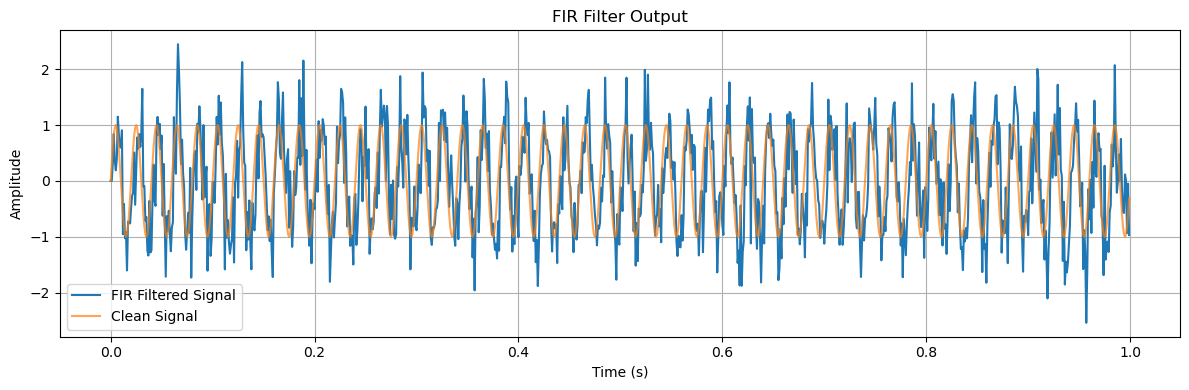

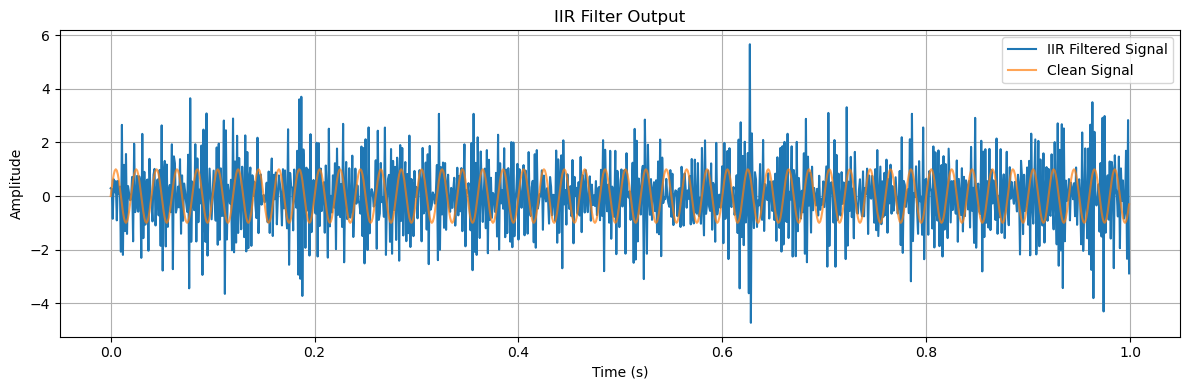

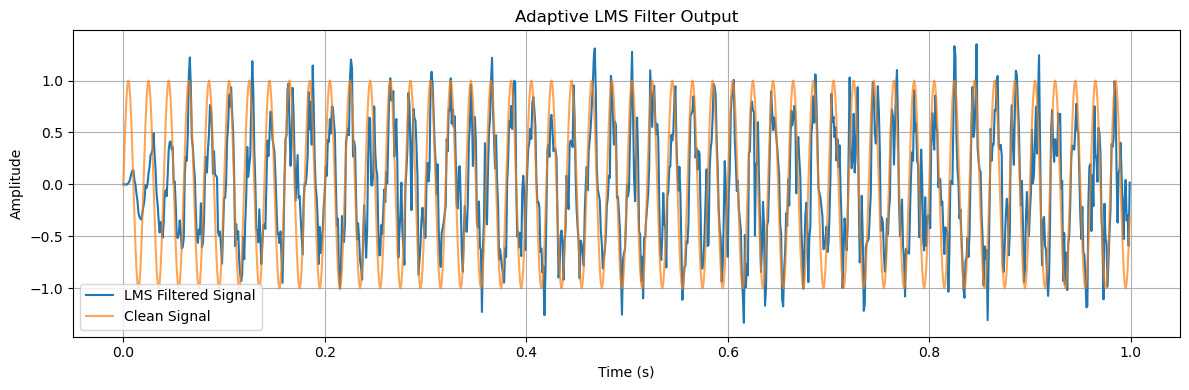